# Instacart Final Report - Part 2

## Table of Contents: (Part 2)
##### 09 - Additional Visualizations
###### ------ 09.01 - Bar Chart: Order Total by Age Group & Income Level
###### ------ 09.02 - Stacked Bar Chart: Order Count by Dependents
###### ------ 09.03 - Clustered Bar: Order Frequency Across Department Categories
###### ------ 09.04 - Stacked Bar Chart: Order Total by Depts & Age Group
###### ------ 09.05 - Bar Chart: Loyalty by Age Group
###### ------ 09.06 - Bar Chart: Spending by Loyalty
###### ------ 09.07 - Bar Chart: Regional Spending
###### ------ 09.08 - Bar Chart: Income vs Departments
###### ------ 09.09 - Bar Chart: Departments vs Regions
###### ------ 09.10 - Bar Chart: Spending by Hour of Day
###### ------ 09.11 - Bar Chart: Number of Orders by Family Status
###### ------ 09.12 - Bar Chart: Total Spending by Family Status

### 09. Additional Visualizations

#### 09.01 Bar Chart: Order Total by Age Group and Income Level

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# path shortcut
path = r'C:\Users\georg\Documents\2025-02-05 Instacart Basket Analysis'

In [3]:
# import dataset
df_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '2025.02.16_Data.pkl'))

C:\Users\georg\AppData\Local\Temp\ipykernel_1520\3348253533.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_orders = df_data.groupby(['age_group', 'income_level'])['order_total'].mean().unstack()


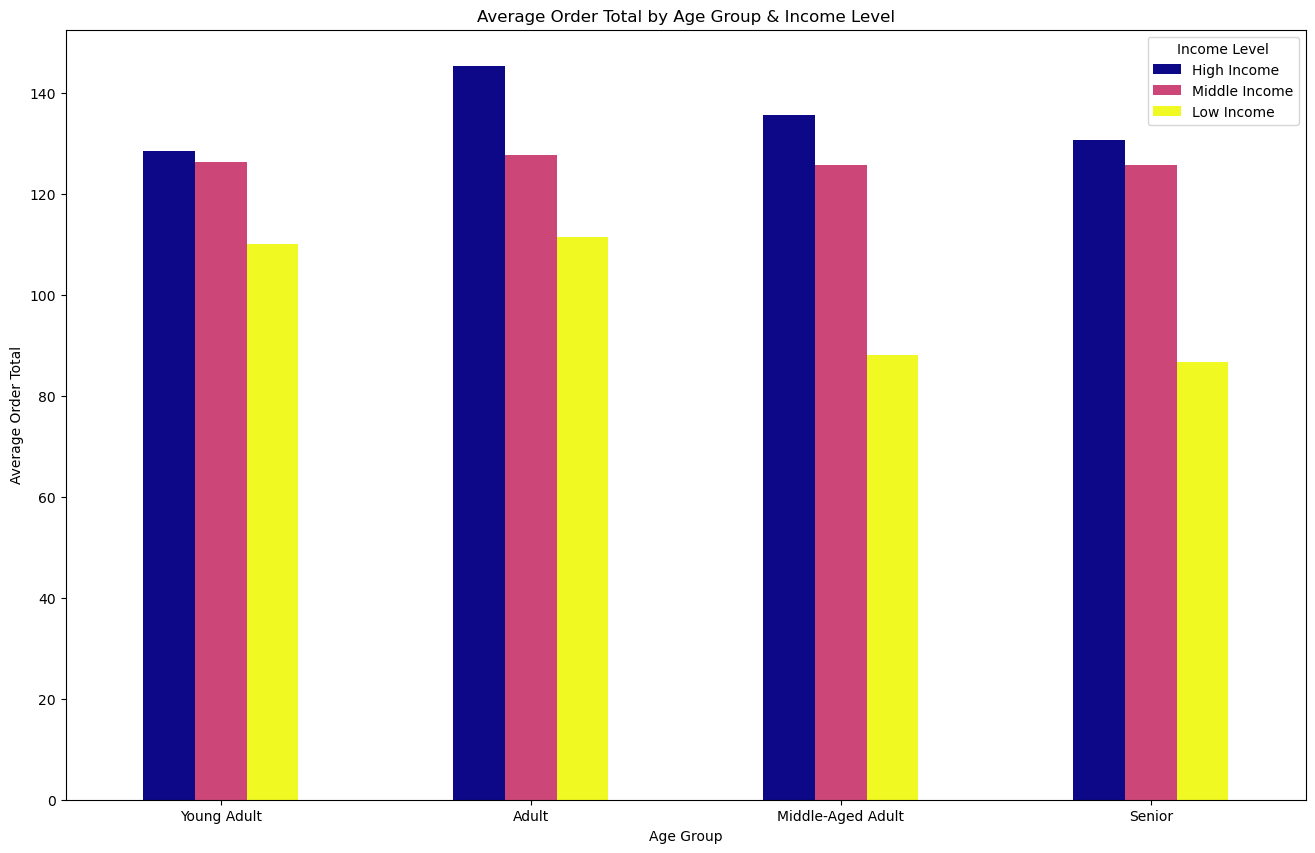

In [25]:
# setting order
age_order = ['Young Adult', 'Adult', 'Middle-Aged Adult', 'Senior']
income_order = ['High Income', 'Middle Income', 'Low Income']

# sorting age group col
df_data['age_group'] = pd.Categorical(df_data['age_group'], categories = age_order, ordered = True)
df_data['income_level'] = pd.Categorical(df_data['income_level'], categories = income_order, ordered = True)

# finding average orders by age and income levels
avg_orders = df_data.groupby(['age_group', 'income_level'])['order_total'].mean().unstack()
avg_orders = avg_orders.loc[age_order]

# bar chart
bar_orders_age_income = avg_orders.plot.bar(colormap = 'plasma', figsize = (16,10))

# title
plt.title('Average Order Total by Age Group & Income Level')
# format Axes
plt.xlabel('Age Group')
plt.xticks(rotation = 0)
plt.ylabel('Average Order Total')

# Legend Title
plt.legend(title = 'Income Level', bbox_to_anchor = (1, 1))

#### Key highlights:
#### - Adult age group had largest average order in the High and Low income levels.
#### - People in the middle income level spent the same on average in all age groups. 
#### - Older low income customers spent on average 20$ lower than the younger low income customers

In [26]:
# exporting chart
bar_orders_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Bar Avg Orders by Age & Income Level.png'))

#### 09.02 Stacked Bar Chart: Order Count by Dependents

C:\Users\georg\AppData\Local\Temp\ipykernel_1520\4182876915.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_counts = df_data.groupby(['has_dependants', 'age_group']).size().unstack()


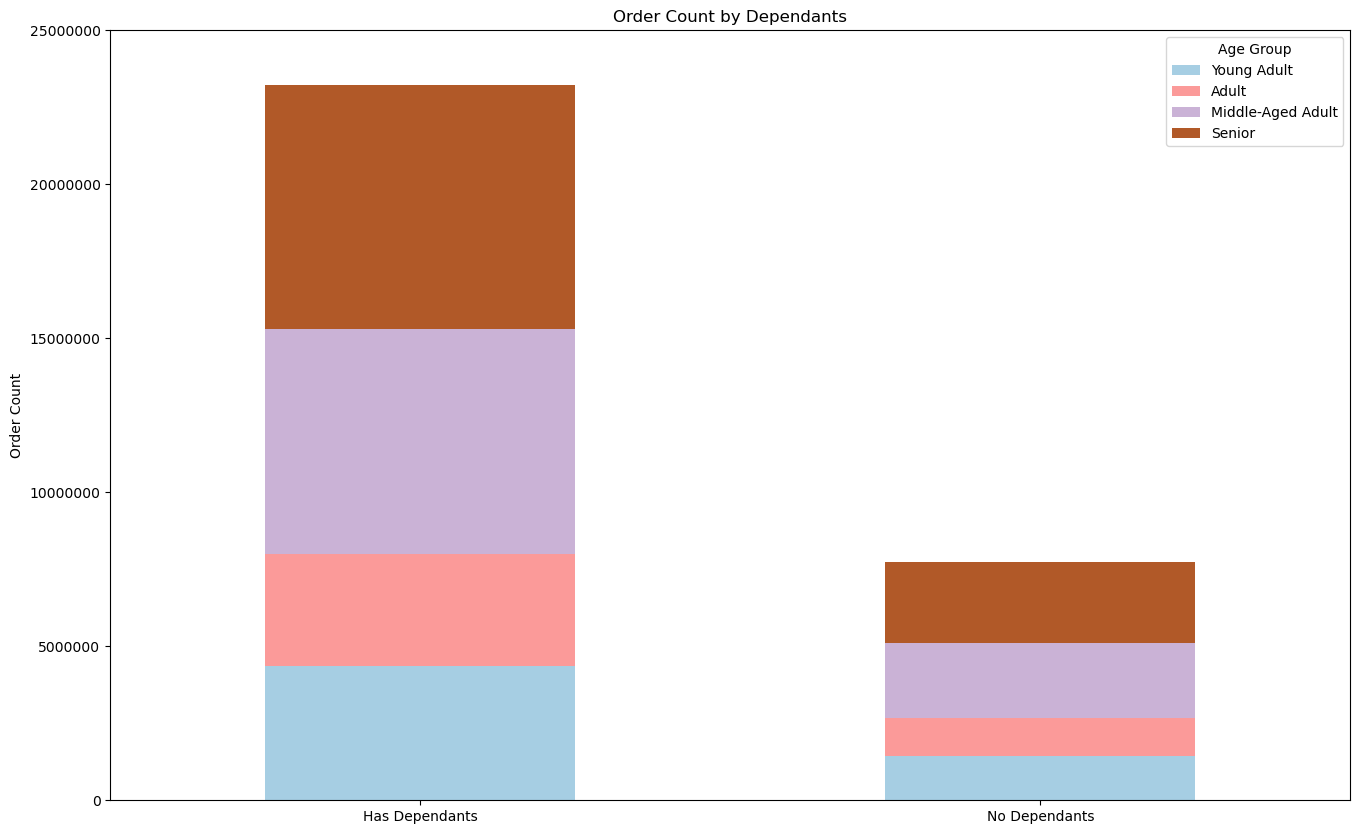

In [27]:
# count orders per dependent category
order_counts = df_data.groupby(['has_dependants', 'age_group']).size().unstack()

# Stacked bar chart
stacked_bar_orders_by_dependants = order_counts.plot(kind = 'bar', stacked = True, colormap = 'Paired', figsize = (16,10))

# title
plt.title('Order Count by Dependants')
# Formatting x-axis
plt.xlabel('')
plt.xticks(rotation = 0)
# Formatting y-axis
plt.ylabel('Order Count')
plt.yticks(np.arange(0, 30000000, 5000000),
           [int(value) if np.floor(value) == value else value for value in np.arange(0, 30000000, 5000000)])
# legend
plt.legend(title = 'Age Group', bbox_to_anchor = (1,1))

In [28]:
# export chart
stacked_bar_orders_by_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Stacked Bar - Order Count by Dependants.png'))

#### Key Highlights:
#### - Customers with dependants placed alot more orders than customers without dependends. Even when comparing same age groups

#### 09.03 Clustered Bar: Order Frequency Across Department Categories

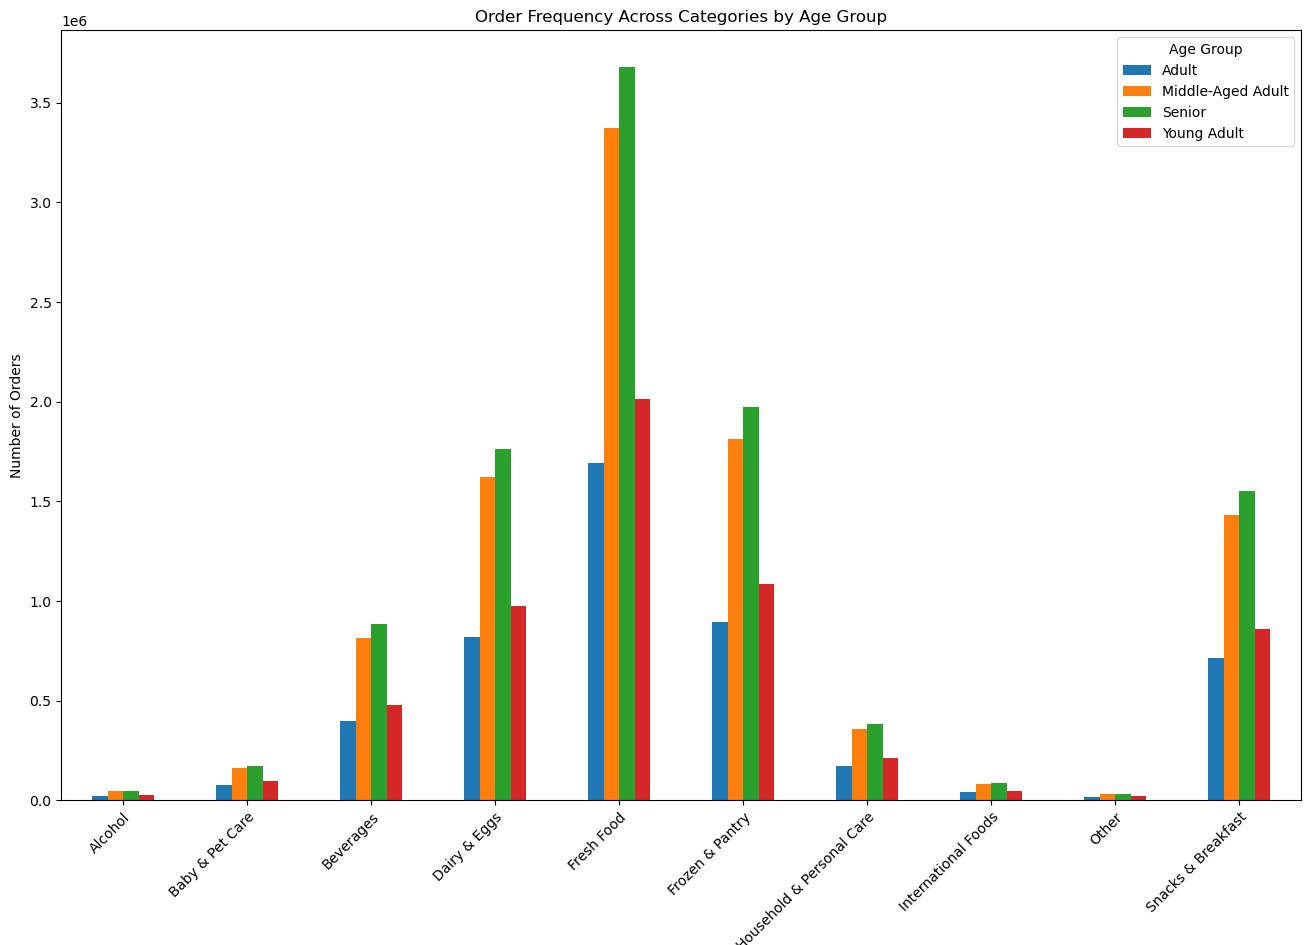

In [15]:
# Aggregate order counts
category_counts = df_data.groupby(['dept_category', 'age_group'])['order_number'].count().unstack()

# chart
clustered_bar_orders_depts = category_counts.plot(kind = 'bar', figsize=(16, 10))

#title
plt.title('Order Frequency Across Categories by Age Group')
# formatting axes
plt.xlabel('Product Category')
plt.xticks(rotation = 45, ha = 'right', wrap = True)
plt.ylabel('Number of Orders')
# legend
plt.legend(title = 'Age Group')

In [16]:
# export chart
clustered_bar_orders_depts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Clustered Bar Chart - No. of Orders by Depts.png'))

#### Key Highlights:
#### - Most in demand products were the Fresh Foods (Deli, Meats & Seafood)
#### - Seniors placed the largest number of orders in most of the departments

#### 09.04 Stacked Bar Chart: Order Total by Depts & Age Group

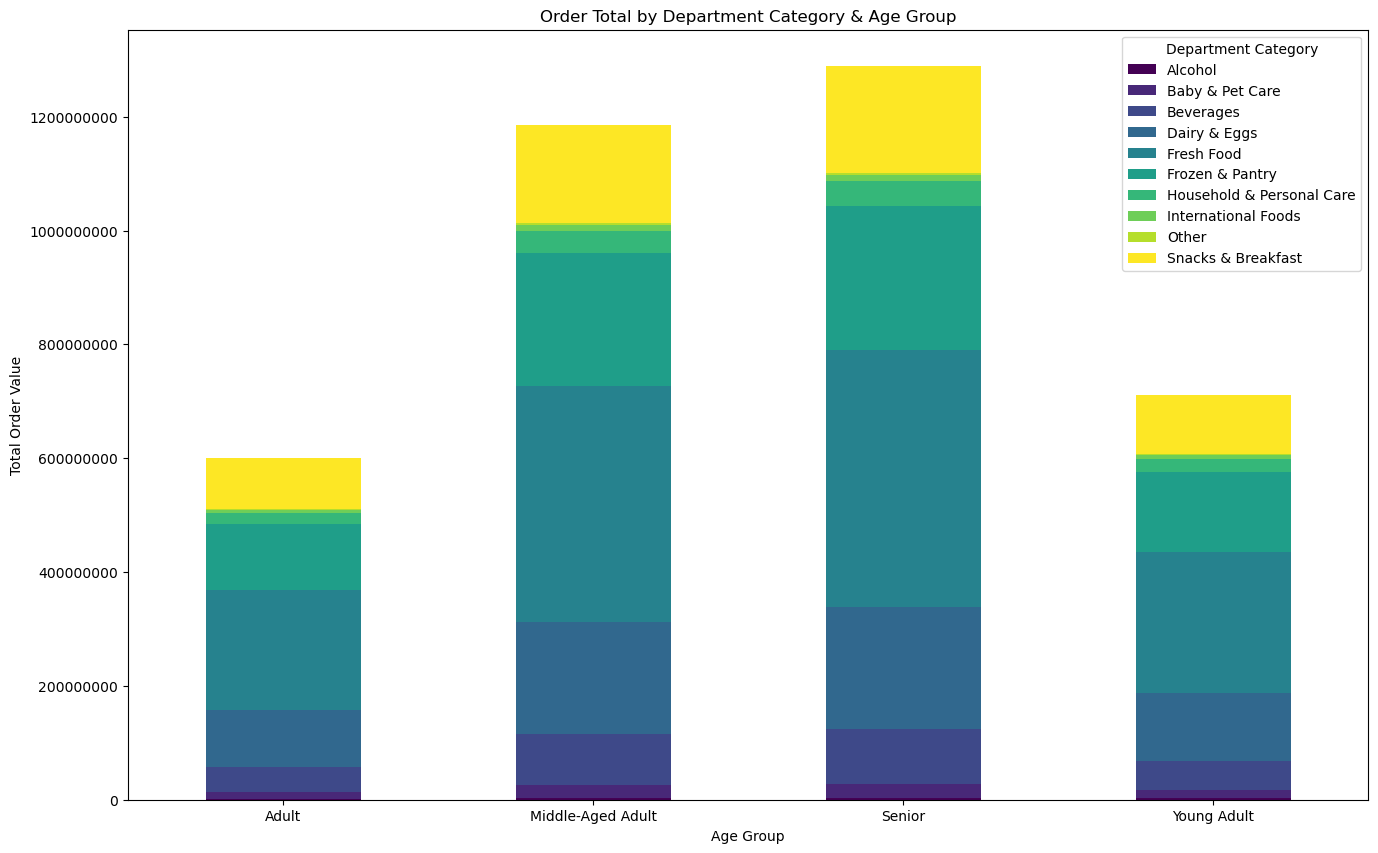

In [23]:
# Summing order total by Department and age group
dept_summary = df_data.groupby(['age_group', 'dept_category'])['order_total'].sum().unstack()

# chart
stacked_bar_orders_by_depts_age = dept_summary.plot(kind = 'bar', stacked = True, colormap = 'viridis',figsize=(16, 10))

# Title
plt.title('Order Total by Department Category & Age Group')
# format Axes
plt.xlabel('Age Group')
plt.xticks(rotation = 0)
plt.ylabel('Total Order Value')
plt.yticks(np.arange(0, 1400000000, 200000000),
           [int(value) if np.floor(value) == value else value for value in np.arange(0, 1400000000, 200000000)])
# Legend
plt.legend(title = 'Department Category', bbox_to_anchor = (1,1))

In [24]:
# export chart
stacked_bar_orders_by_depts_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Stacked Bar - Order Total by Dept & Age Group.png'))

#### Key Highlights:
#### - Seniors spent the most on orders
#### - Largest dept category was Fresh food (deli, meat & seafood)

#### 09.05 Bar Chart: Loyalty by Age Group

C:\Users\georg\AppData\Local\Temp\ipykernel_14736\1851712068.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_loyalty_age = df_data.groupby('age_group')['loyalty_flag'].value_counts().unstack().plot.bar()


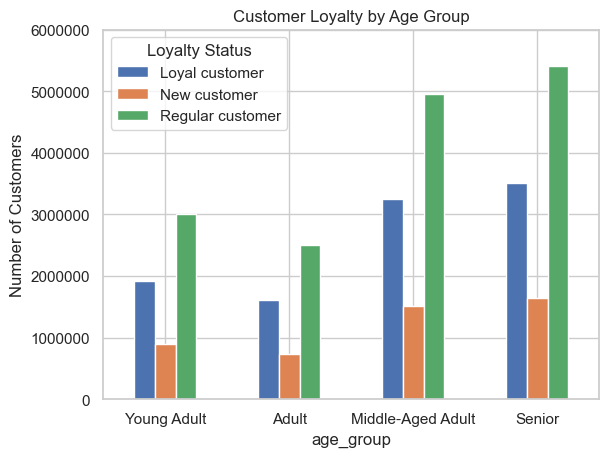

In [57]:
# bar chart
bar_loyalty_age = df_data.groupby('age_group')['loyalty_flag'].value_counts().unstack().plot.bar()

# Title
plt.title('Customer Loyalty by Age Group')
# Axis
plt.xticks(rotation = 0)
plt.ylabel('Number of Customers')
plt.yticks(np.arange(0, 7000000, 1000000),
           [int(value) if np.floor(value) == value else value for value in np.arange(0, 7000000, 1000000)])
# Legend
plt.legend(title = 'Loyalty Status')

In [58]:
# export chart
bar_loyalty_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Bar - Customer Loyalty by Age.png'))

#### Key Highlights:
#### - Seniors placed the most orders in each loyalty status.
#### - Regular customers placed more orders than loyal customers

#### 09.06 Bar Chart: Spending by Loyalty

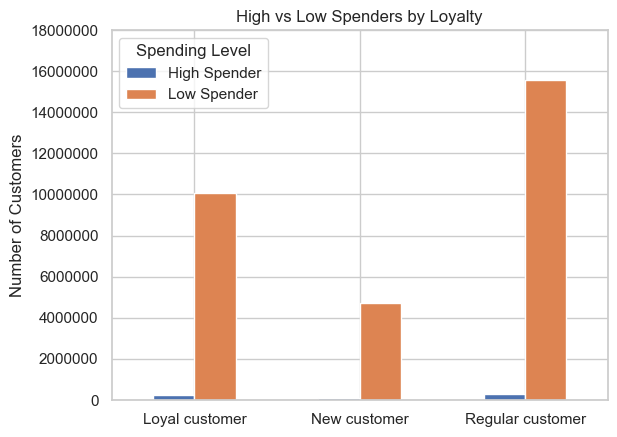

In [60]:
# bar chart
bar_loyalty_spending = df_data.groupby('loyalty_flag')['spending_flag'].value_counts().unstack().plot.bar()

# Title
plt.title('High vs Low Spenders by Loyalty')
# Axis
plt.xlabel('')
plt.xticks(rotation = 0)
plt.ylabel('Number of Customers')
plt.yticks(np.arange(0, 20000000, 2000000),
           [int(value) if np.floor(value) == value else value for value in np.arange(0, 20000000, 2000000)])
# Legend
plt.legend(title = 'Spending Level')

In [61]:
# export chart
bar_loyalty_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Bar - Customer Spenders by Loyalty.png'))

#### Key Highlights:
#### - Very few high spenders

In [63]:
df_data['spending_flag'].value_counts(dropna = False)

spending_flag
Low Spender     30361139
High Spender      603425
Name: count, dtype: int64

#### 09.07 Bar Chart: Regional Spending

([<matplotlib.axis.YTick at 0x1ffd27b6000>,
 [Text(0, 0, '0'),
  Text(0, 200000000, '200000000'),
  Text(0, 400000000, '400000000'),
  Text(0, 600000000, '600000000'),
  Text(0, 800000000, '800000000'),
  Text(0, 1000000000, '1000000000'),
  Text(0, 1200000000, '1200000000'),
  Text(0, 1400000000, '1400000000'),
  Text(0, 1600000000, '1600000000'),
  Text(0, 1800000000, '1800000000')])

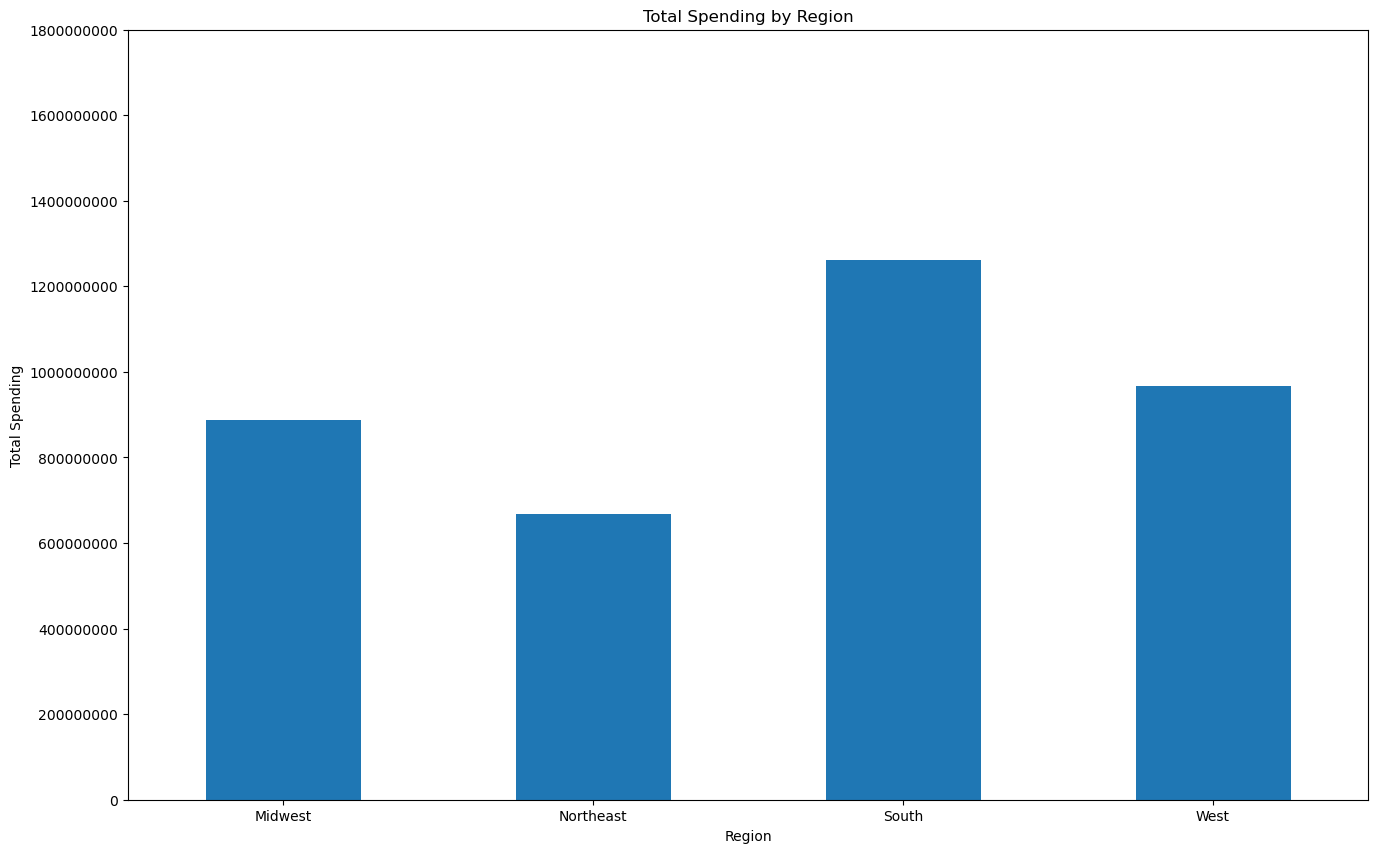

In [19]:
# bar chart
bar_regional_spending = df_data.groupby('region')['order_total'].sum().plot(kind = 'bar', figsize=(16, 10))

# Title
plt.title('Total Spending by Region')
# Axis
plt.xlabel('Region')
plt.xticks(rotation = 0)
plt.ylabel('Total Spending')
plt.yticks(np.arange(0, 2000000000, 200000000),
           [int(value) if np.floor(value) == value else value for value in np.arange(0, 2000000000, 200000000)])


In [20]:
# export chart
bar_regional_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Bar - Regional Spending.png'))

#### Key Findings:
#### - South Region spent the most.
#### - Northeast region spent the least - might have to focus marketing efforts here. 

#### 09.08 Bar Chart: Income vs Departments

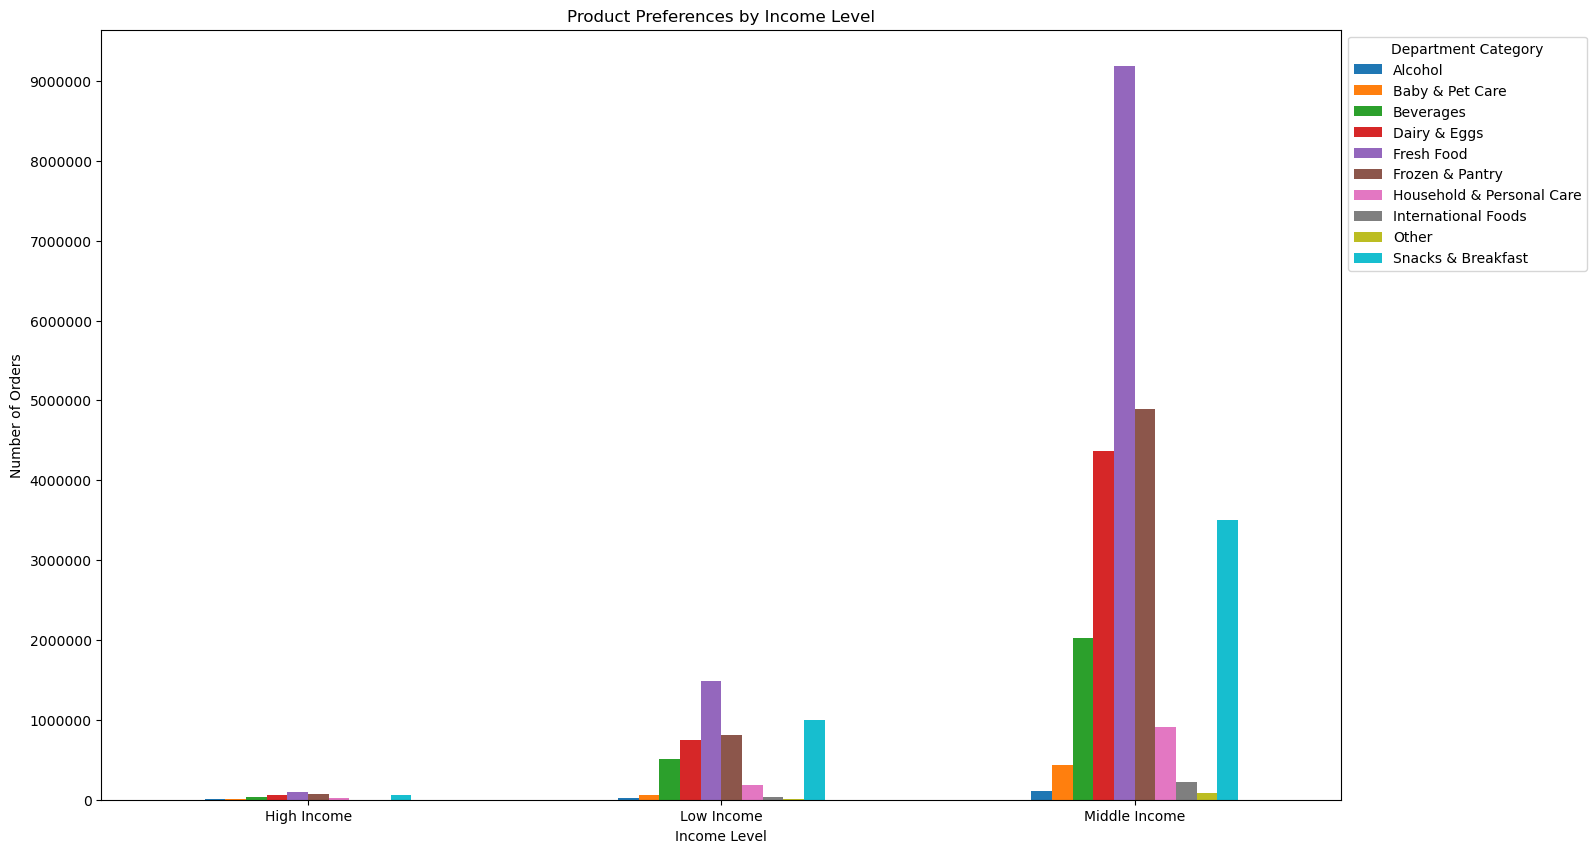

In [17]:
# bar chart
bar_income_dept = df_data.groupby('income_level')['dept_category'].value_counts().unstack().plot(kind = 'bar', figsize=(16, 10))

# Title
plt.title('Product Preferences by Income Level')
# Axis
plt.xlabel('Income Level')
plt.xticks(rotation = 0)
plt.ylabel('Number of Orders')
plt.yticks(np.arange(0, 10000000, 1000000),
           [int(value) if np.floor(value) == value else value for value in np.arange(0, 10000000, 1000000)])
# legend
plt.legend(title = 'Department Category', bbox_to_anchor = (1,1))


In [73]:
df_data['income_level'].value_counts(dropna = False)

income_level
Middle Income    25729841
Low Income        4883273
High Income        351450
Name: count, dtype: int64

In [18]:
# export chart
bar_income_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Bar - Dept Preference by Income Level.png'))

#### Key Highlights:
#### - Very low orders by the high income customers. Which makes sense since the high income customers make up around 1% of the total customer population,
#### - Top dept category was fresh food (deli, meat & seafood) in both low and middle income customers.
#### - Middle income customers spent more on Frozen & Patry and Dairy & Eggs department categories than they did on Snacks & Breakfast. While low income customers decided to spend more on Snacks & Breakfast.

#### 09.09 Bar Chart: Departments vs Regions

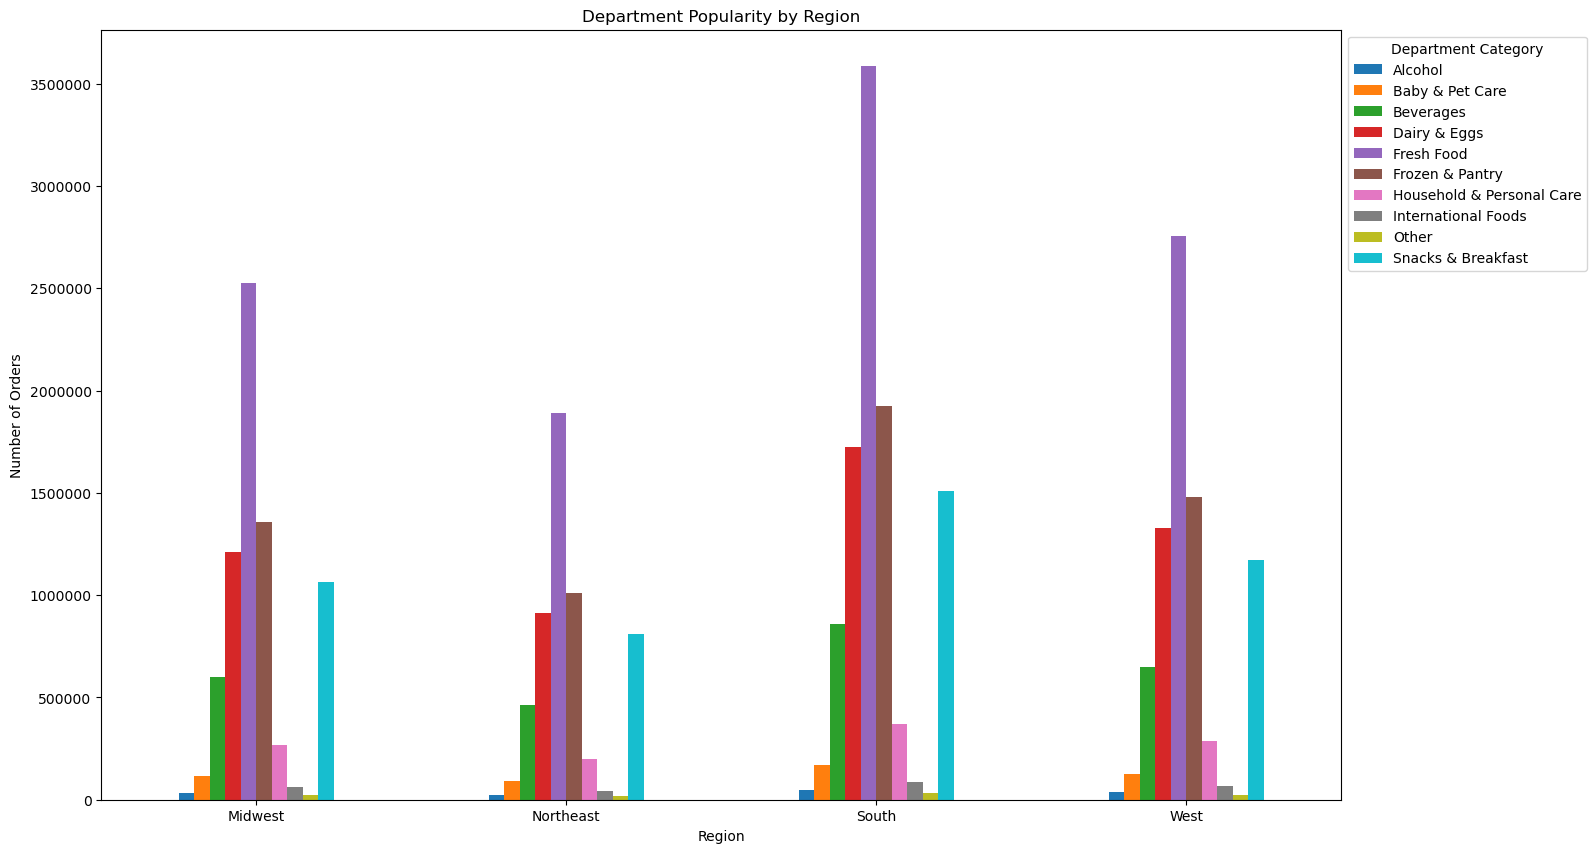

In [21]:
# bar chart
bar_dept_region = df_data.groupby('region')['dept_category'].value_counts().unstack().plot(kind = 'bar', figsize=(16, 10))

# Title
plt.title('Department Popularity by Region')
# Axis
plt.xlabel('Region')
plt.xticks(rotation = 0)
plt.ylabel('Number of Orders')
plt.yticks(np.arange(0, 4000000, 500000),
         [int(value) if np.floor(value) == value else value for value in np.arange(0, 4000000, 500000)])
# legend
plt.legend(title = 'Department Category', bbox_to_anchor = (1,1))


In [22]:
# export chart
bar_dept_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Bar - Dept by Region.png'))

#### KEy Highlights:
#### - Nothing unusual stands out. Seems like all regions buy the same items. 

#### 09.10 Bar Chart: Spending by Hour of Day

In [6]:
# Convert spending_flag to numeric values
df_data["spending_flag"] = df_data["spending_flag"].map({"Low Spender": 0, "High Spender": 1})

# Check if there are any unexpected values
print(df_data["spending_flag"].unique())  # Should print [0, 1] if all values are mapped correctly

[0 1]


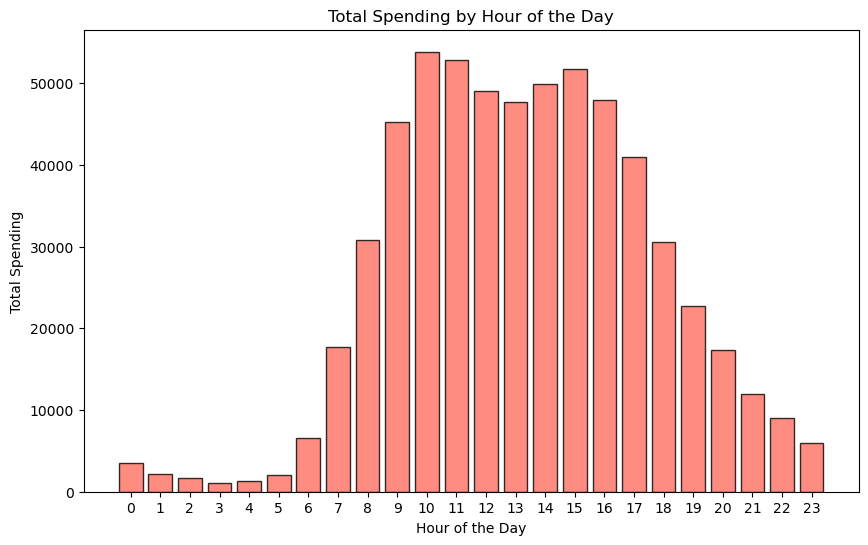

In [7]:
# Ensure spending_flag is numeric (1 for high spenders, 0 for low spenders)
df_data["spending_flag"] = df_data["spending_flag"].astype(int)

# Aggregate spending by hour
spending_by_hour = df_data.groupby("time_of_order")["spending_flag"].sum().reset_index()

# Create figure
plt.figure(figsize=(10, 6))
plt.bar(spending_by_hour["time_of_order"], spending_by_hour["spending_flag"], color="#FF6F61", edgecolor="black", alpha=0.8)

# Labels
plt.title("Total Spending by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Spending")
plt.xticks(range(0, 24))  # Show every hour on x-axis

# Save figure
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'Bar - Spending by Hour.png')
plt.savefig(save_path, dpi=300, bbox_inches="tight")

#### 09.11 Bar Chart: Number of Orders by Family Status

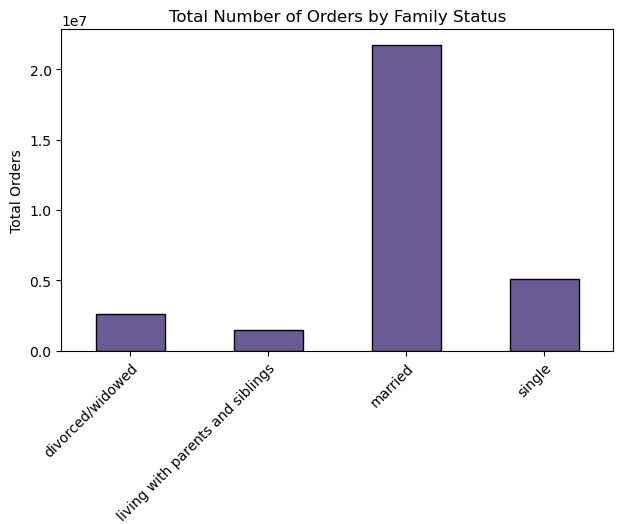

In [35]:
# Define export path
export_path = os.path.join(path, '04 Analysis', 'Visualizations')

# Aggregate total number of orders by family status
orders_by_fam_status = df_data.groupby('family_status')['order_number'].count()

# Figure for total number of orders
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
orders_by_fam_status.plot(kind='bar', color="#6B5B95", edgecolor="black")
plt.title("Total Number of Orders by Family Status")
plt.xlabel("Family Status")
plt.ylabel("Total Orders")
plt.xticks(rotation=45, ha = 'right', wrap = True)

plt.tight_layout()  # Adjust layout to fit everything

# Save figure
plt.savefig(os.path.join(export_path, 'Family_Status_vs_Orders.png'), dpi=300, bbox_inches='tight')

plt.show()

#### 09.12 Bar Chart: Total Spending by Family Status

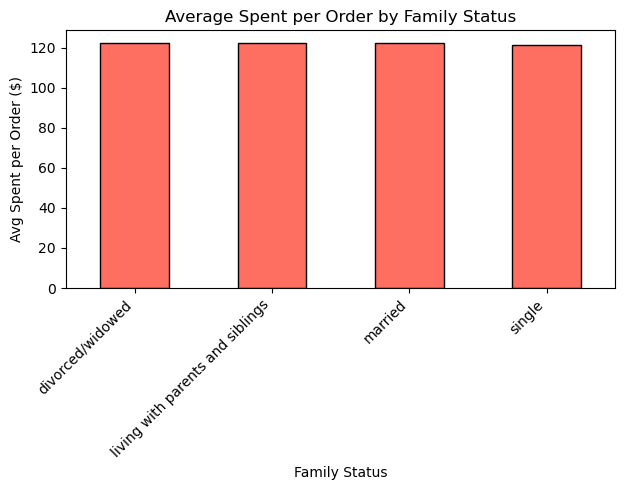

In [37]:
# Aggregate average total orders per customer by family status
avg_spent_by_fam_status = df_data.groupby('family_status')['order_total'].mean()

# Figure for total number of orders
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)  
avg_spent_by_fam_status.plot(kind='bar', color="#FF6F61", edgecolor="black")
plt.title("Average Spent per Order by Family Status")
plt.xlabel("Family Status")
plt.ylabel("Avg Spent per Order ($)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()  # Adjust layout to fit everything

# Save figure
plt.savefig(os.path.join(export_path, 'Family_Status_vs_Orders2.png'), dpi=300, bbox_inches='tight')

In [79]:
# exporting dataset
df_data.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '2025.02.16 - Final Data.pkl'))